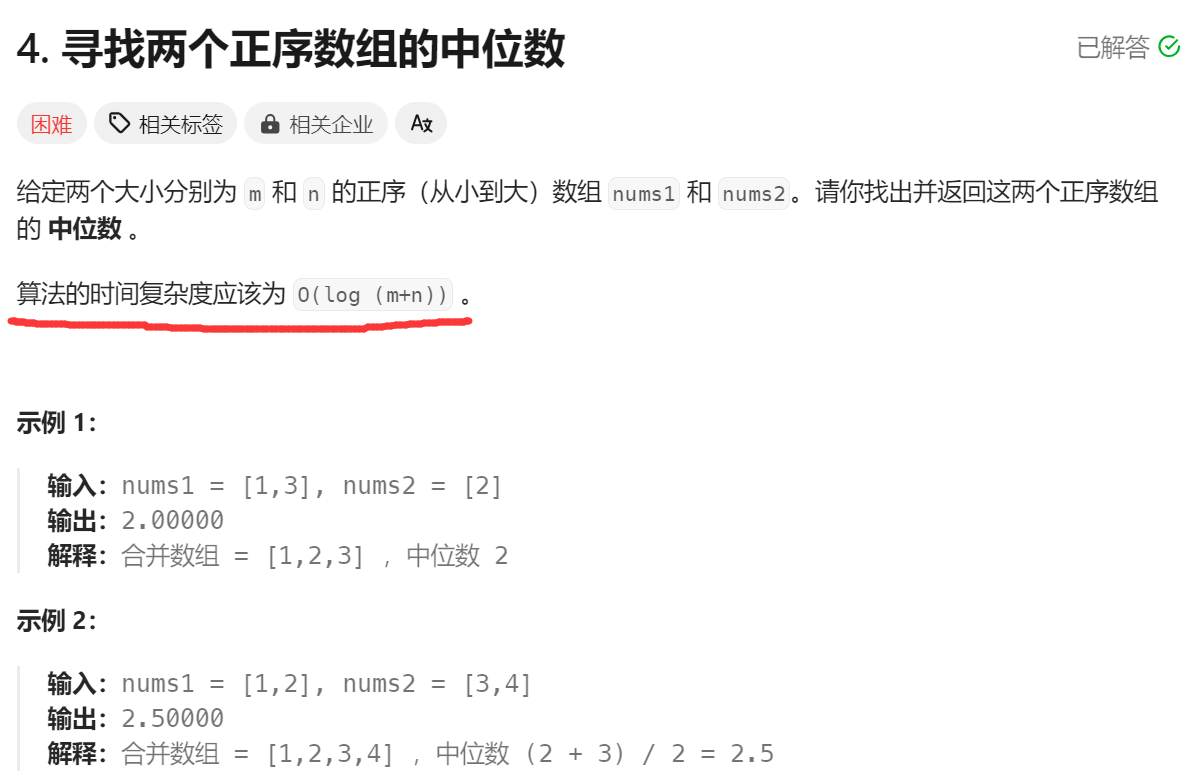

方法一：先合并再计算 时间复杂度不满足

方法二：通过二分搜索，确定合适的分界线来划分数组1和数组2，然后计算中位数  
时间复杂度log(m) m为较短者的数组长度  
例1：数组1：1 2 数组2：3 4 分界线如下：  
1 2|    
|3 4  
例2：数组1：3 4 10 数组2：1 2 4 7 分界线如下：  
3 4 | 10  
1 2 | 4 7  
计算中位数：  
如果数组长度之和为奇数 则中位数=分界线左边最大值  
如果数组长度之和为偶数 则中位数=(分界线左边最大值+分界线右边最小值)/2  
例1： (2+3)/2  
例2：4

In [3]:
from typing import List
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        # 将较短者作为nums1
        if len(nums1) > len(nums2):
            return self.findMedianSortedArrays(nums2, nums1)

        infinty = 2**40
        m, n = len(nums1), len(nums2)
        left, right = 0, m
        # median1：前一部分的最大值
        # median2：后一部分的最小值
        median1, median2 = 0, 0

        # 二分查找两个数组的分界线 i j代表分界线右边的第一个元素
        while left <= right:
            # 前一部分包含 nums1[0 .. i-1] 和 nums2[0 .. j-1]
            # 后一部分包含 nums1[i .. m-1] 和 nums2[j .. n-1]
            i = (left + right) // 2
            j = (m + n + 1) // 2 - i

            # nums_im1, nums_i, nums_jm1, nums_j 分别表示 nums1[i-1], nums1[i], nums2[j-1], nums2[j]
            nums_im1 = (-infinty if i == 0 else nums1[i - 1])
            nums_i = (infinty if i == m else nums1[i])
            nums_jm1 = (-infinty if j == 0 else nums2[j - 1])
            nums_j = (infinty if j == n else nums2[j])

            if nums_im1 <= nums_j:
                median1, median2 = max(nums_im1, nums_jm1), min(nums_i, nums_j)
                left = i + 1
            else:
                right = i - 1

        return (median1 + median2) / 2 if (m + n) % 2 == 0 else median1

In [4]:
Solution().findMedianSortedArrays(nums1 = [1,2], nums2 = [3,4])

2.5

In [5]:
Solution().findMedianSortedArrays(nums1 = [3,4,10], nums2 = [1,2,4,7])

4